In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Crude oil.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63


In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [5]:
df.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63
5,2022-10-21,85.14,259938.0,85.07,85.90,83.15
6,2022-10-20,85.98,12307.0,85.94,88.17,85.22
7,2022-10-19,85.55,38236.0,83.69,86.20,82.59
8,2022-10-18,82.82,83685.0,85.70,86.51,82.09
9,2022-10-17,85.46,143488.0,85.59,87.12,84.61


In [6]:
df_sorted = df.sort_values(by='Date',ascending=True)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.to_csv('Crude oil.csv', index=False)

In [7]:
 df_sorted.head()

,Date,Close/Last,Volume,Open,High,Low
0,2012-10-31,86.24,192354.0,85.73,87.19,85.61
1,2012-11-01,87.09,185097.0,86.10,87.42,85.92
2,2012-11-02,84.86,273619.0,86.91,87.24,84.66
3,2012-11-05,85.65,185846.0,84.65,85.90,84.34
4,2012-11-06,88.71,270163.0,85.67,89.22,85.42


In [8]:
df_sorted.tail()

,Date,Close/Last,Volume,Open,High,Low
2512,2022-10-24,84.58,238458.0,85.24,85.92,82.63
2513,2022-10-25,85.32,226337.0,84.88,86.03,83.06
2514,2022-10-26,87.91,271474.0,85.07,88.41,84.14
2515,2022-10-27,88.26,273717.0,88.26,89.79,87.33
2516,2022-10-28,87.90,241417.0,88.67,88.76,87.08


In [9]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [10]:
df_cleaned = df.dropna(subset=['Volume'])
df_cleaned.to_csv('Crude oil.csv', index=False)

In [11]:
df_cleaned.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler
df['Date'] = pd.to_datetime(df['Date'])
numerical_data = df[['Close/Last','Volume', 'Open', 'High', 'Low']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numerical_data)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)

scaled_df['Date'] = df['Date'].values

print(scaled_df)


      Close/Last    Volume      Open      High       Low       Date
0       0.778095  0.142465  0.778100  0.752915  0.790764 2022-10-28
1       0.780326  0.161538  0.775567  0.759172  0.792316 2022-10-27
2       0.778157  0.160213  0.755855  0.750790  0.772516 2022-10-26
3       0.762103  0.133560  0.754681  0.736334  0.765812 2022-10-25
4       0.757516  0.140718  0.756905  0.735666  0.763143 2022-10-24
...          ...       ...       ...       ...       ...        ...
2512    0.783115  0.159439  0.759563  0.755709  0.780461 2012-11-06
2513    0.764148  0.109650  0.753260  0.735544  0.773757 2012-11-05
2514    0.759251  0.161480  0.767225  0.743683  0.775743 2012-11-02
2515    0.773074  0.109208  0.762220  0.744776  0.783564 2012-11-01
2516    0.767805  0.113493  0.759933  0.743379  0.781640 2012-10-31

[2517 rows x 6 columns]


In [13]:
train_size = int(len(scaled_data)* 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

print("trainig Data:")
print(train_data)
print("\nTesting Data:")
print(test_data)

trainig Data:
[[0.77809459 0.1424648  0.77810048 0.75291545 0.79076407]
 [0.78032604 0.16153774 0.77556695 0.75917153 0.79231581]
 [0.77815657 0.16021326 0.75585491 0.7507896  0.77251567]
 ...
 [0.72094465 0.25435504 0.70821232 0.69576045 0.72484638]
 [0.71170892 0.24447254 0.71352654 0.69005102 0.72099808]
 [0.7215645  0.21892484 0.72817154 0.70566084 0.73490162]]

Testing Data:
[[0.73247381 0.16400777 0.73095223 0.70742225 0.74402582]
 [0.73606893 0.14920469 0.73645183 0.71240282 0.75128794]
 [0.74276328 0.15883918 0.73410369 0.71720117 0.75575694]
 ...
 [0.75925122 0.16147987 0.76722487 0.74368319 0.77574328]
 [0.77307382 0.10920821 0.76221961 0.74477648 0.78356402]
 [0.76780512 0.11349342 0.75993326 0.74337949 0.78163987]]


In [14]:
def create_dataset(data, window_size=1):
    X,y = [], []
    for i in range(len(data) - window_size):
        a = data[i:(i + window_size), 0]
        X.append(a)
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 60
X_train,y_train = create_dataset(scaled_data, window_size)
X_test,y_test = create_dataset(scaled_data, window_size)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

print("X_train shape:", X_train.shape)
print("y_train shape:" ,y_train.shape)
print("X_test shape:" ,X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (2457, 60, 1)
y_train shape: (2457,)
X_test shape: (2457, 60, 1)
y_test shape: (2457,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,Dropout,Dense
from tensorflow.keras.optimizers import Adam

In [16]:
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(window_size,1))))
model_bilstm.add(Dropout(0.2))
model_bilstm.add(Bidirectional(LSTM(units=100,return_sequences=False)))
model_bilstm.add(Dropout(0.2))
model_bilstm.add(Dense(units=50))
model_bilstm.add(Dense(units=1))

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model_bilstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)
history = model_bilstm.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 52s 377ms/step - loss: 0.0437 - mae: 0.1393 - val_loss: 0.0017 - val_mae: 0.0322
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 258ms/step - loss: 0.0026 - mae: 0.0393 - val_loss: 0.0016 - val_mae: 0.0328
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 5.5479e-04 - val_mae: 0.0179
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 3.9169e-04 - val_mae: 0.0162
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - loss: 0.0014 - mae: 0.0286 - val_loss: 4.9992e-04 - val_mae: 0.0178
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - loss: 0.0012 - mae: 0.0262 - val_loss: 2.6185e-04 - val_mae: 0.0130
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - loss: 9.3363e-04 - mae: 0.0237 - val_loss: 2.0459e-04 - val_mae: 0.0115
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - loss: 0.0011 - mae: 0.0245 - val_loss: 3.1475e-04 - val_mae: 0.0146
Epoch 9/10
62/62 ━━━

In [18]:
test_loss, test_mae = model_bilstm.evaluate(X_test, y_test, verbose=1)
print(f' Test Loss:{test_loss}')
print(f' Test MAE: {test_mae}')

77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 6.4589e-04 - mae: 0.0193
 Test Loss:0.00045191406388767064
 Test MAE: 0.01626972295343876


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam


model_gru = Sequential()
model_gru.add(GRU(units=100, return_sequences=True, input_shape=(window_size, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=100, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))  


model_gru.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)


history = model_gru.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

test_loss, test_mae = model_gru.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - loss: 0.0557 - mae: 0.1643 - val_loss: 0.0053 - val_mae: 0.0718
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.0026 - mae: 0.0397 - val_loss: 9.9381e-04 - val_mae: 0.0297
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - loss: 0.0023 - mae: 0.0368 - val_loss: 2.2612e-04 - val_mae: 0.0124
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 2.6540e-04 - val_mae: 0.0137
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 236ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 1.4695e-04 - val_mae: 0.0100
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - loss: 0.0016 - mae: 0.0313 - val_loss: 1.2576e-04 - val_mae: 0.0091
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0012 - val_mae: 0.0329
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - loss: 0.0017 - mae: 0.0315 - val_loss: 1.1484e-04 - val_mae: 0.0087
Epoch 9/10
62/62 ━━━━━━━

In [20]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(window_size, 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1)) 


model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)


history_lstm = model_lstm.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)


test_loss_lstm, test_mae_lstm = model_lstm.evaluate(X_test, y_test, verbose=1)
print(f'LSTM Test Loss: {test_loss_lstm}')
print(f'LSTM Test MAE: {test_mae_lstm}')

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - loss: 0.0530 - mae: 0.1583 - val_loss: 0.0049 - val_mae: 0.0684
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0028 - mae: 0.0410 - val_loss: 2.4204e-04 - val_mae: 0.0125
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0019 - val_mae: 0.0413
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 0.0023 - mae: 0.0363 - val_loss: 2.1188e-04 - val_mae: 0.0117
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0019 - mae: 0.0334 - val_loss: 5.2110e-04 - val_mae: 0.0193
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0020 - mae: 0.0334 - val_loss: 3.6105e-04 - val_mae: 0.0156
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0025 - mae: 0.0387 - val_loss: 7.2840e-04 - val_mae: 0.0237
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0017 - mae: 0.0317 - val_loss: 0.0013 - val_mae: 0.0336
Epoch 9/10
62/62 ━━━━━━━━━━━━━

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam


In [22]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=100, return_sequences=True, input_shape=(window_size, 1)))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(units=100, return_sequences=False))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(units=1))


model_rnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)


history_rnn = model_rnn.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)


test_loss_rnn, test_mae_rnn = model_rnn.evaluate(X_test, y_test, verbose=1)
print(f'RNN Test Loss: {test_loss_rnn}')
print(f'RNN Test MAE: {test_mae_rnn}')

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.1782 - mae: 0.3094 - val_loss: 0.0016 - val_mae: 0.0376
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0202 - mae: 0.1108 - val_loss: 0.0013 - val_mae: 0.0342
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0118 - mae: 0.0851 - val_loss: 1.9403e-04 - val_mae: 0.0114
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0086 - mae: 0.0735 - val_loss: 2.0504e-04 - val_mae: 0.0117
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0072 - mae: 0.0659 - val_loss: 0.0031 - val_mae: 0.0540
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0060 - mae: 0.0617 - val_loss: 7.2508e-04 - val_mae: 0.0253
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0055 - mae: 0.0582 - val_loss: 2.1515e-04 - val_mae: 0.0121
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0048 - mae: 0.0537 - val_loss: 9.1047e-05 - val_mae: 0.0076
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 65

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam


model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))


model_cnn.add(Flatten())
model_cnn.add(Dense(units=1, activation='relu'))


model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)


history_cnn = model_cnn.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)


test_loss_cnn, test_mae_cnn = model_cnn.evaluate(X_test, y_test, verbose=1)
print(f'CNN Test Loss: {test_loss_cnn}')
print(f'CNN Test MAE: {test_mae_cnn}')


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.3109 - mae: 0.5257 - val_loss: 0.0133 - val_mae: 0.1102
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mae: 0.0540 - val_loss: 0.0288 - val_mae: 0.1667
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039 - mae: 0.0481 - val_loss: 0.0227 - val_mae: 0.1476
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mae: 0.0457 - val_loss: 0.0361 - val_mae: 0.1877
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mae: 0.0436 - val_loss: 0.0268 - val_mae: 0.1613
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0028 - mae: 0.0413 - val_loss: 0.0333 - val_mae: 0.1807
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mae: 0.0379 - val_loss: 0.0317 - val_mae: 0.1764
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0024 - mae: 0.0377 - val_loss: 0.0312 - val_mae: 0.1749
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.002

In [24]:
predictions_bi_lstm = model_bilstm.predict(X_test)
predictions_rnn = model_rnn.predict(X_test)
predictions_cnn = model_cnn.predict(X_test)
predictions_lstm = model_lstm.predict(X_test)
predictions_gru = model_gru.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error

# BiLSTM model
mae_bi_lstm = mean_absolute_error(y_test, predictions_bi_lstm)
mse_bi_lstm = mean_squared_error(y_test, predictions_bi_lstm)
print(f'BiLSTM - MAE: {mae_bi_lstm}, MSE: {mse_bi_lstm}')

# RNN model
mae_rnn = mean_absolute_error(y_test, predictions_rnn)
mse_rnn = mean_squared_error(y_test, predictions_rnn)
print(f'RNN - MAE: {mae_rnn}, MSE: {mse_rnn}')

# CNN model
mae_cnn = mean_absolute_error(y_test, predictions_cnn)
mse_cnn = mean_squared_error(y_test, predictions_cnn)
print(f'CNN - MAE: {mae_cnn}, MSE: {mse_cnn}')

# LSTM model
mae_lstm = mean_absolute_error(y_test, predictions_lstm)
mse_lstm = mean_squared_error(y_test, predictions_lstm)
print(f'LSTM - MAE: {mae_lstm}, MSE: {mse_lstm}')

# GRU model
mae_gru = mean_absolute_error(y_test, predictions_gru)
mse_gru = mean_squared_error(y_test, predictions_gru)
print(f'GRU - MAE: {mae_gru}, MSE: {mse_gru}')


77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step
BiLSTM - MAE: 0.01626971953454034, MSE: 0.00045191405992985544
RNN - MAE: 0.024441558794474592, MSE: 0.0007619284529797913
CNN - MAE: 0.12549710743454948, MSE: 0.017550370477418867
LSTM - MAE: 0.01335848277447336, MSE: 0.0003831389202001547
GRU - MAE: 0.01592385637653581, MSE: 0.00040995048873168323


In [25]:
print("Length of actual prices (y_test):", len(y_test))
print("Length of dates:", len(df_sorted['Date'].values[train_size + window_size + 1:]))
print("Length of predictions (Bidirectional LSTM):", len(predictions_bi_lstm))
print("Length of predictions (RNN):", len(predictions_rnn))
print("Length of predictions (CNN):", len(predictions_cnn))
print("Length of predictions (LSTM):", len(predictions_lstm))


Length of actual prices (y_test): 2457
Length of dates: 443
Length of predictions (Bidirectional LSTM): 2457
Length of predictions (RNN): 2457
Length of predictions (CNN): 2457
Length of predictions (LSTM): 2457


Adjusting end_index from 4944 to 2517


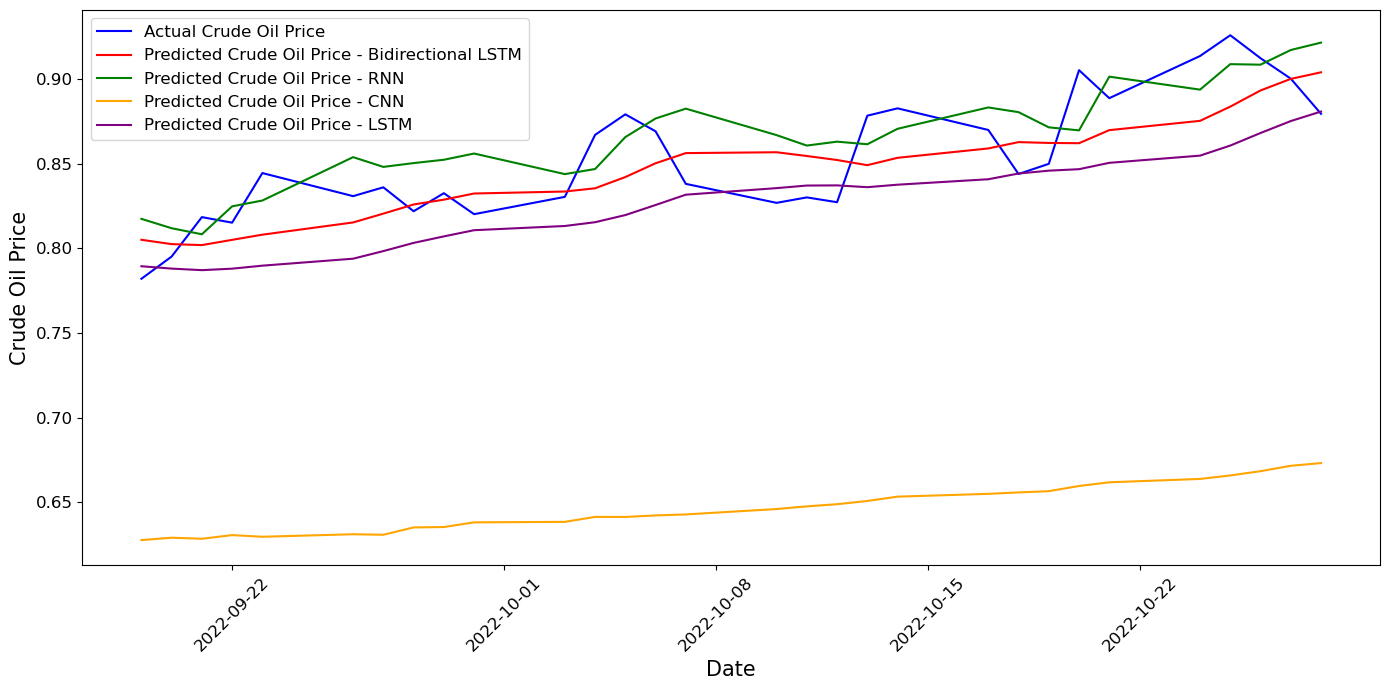

In [26]:
train_size = len(X_train)  
window_size = 30  
start_index = train_size + window_size  
end_index = start_index + len(y_test) 


if end_index > len(df_sorted):
    print(f"Adjusting end_index from {end_index} to {len(df_sorted)}")
    end_index = len(df_sorted)


plt.figure(figsize=(14, 7))


plt.plot(df_sorted['Date'].values[start_index:end_index], y_test[:end_index - start_index], 
         color='blue', label='Actual Crude Oil Price')


plt.plot(df_sorted['Date'].values[start_index:end_index], predictions_bi_lstm[:end_index - start_index], 
         color='red', label='Predicted Crude Oil Price - Bidirectional LSTM')
plt.plot(df_sorted['Date'].values[start_index:end_index], predictions_rnn[:end_index - start_index], 
         color='green', label='Predicted Crude Oil Price - RNN')
plt.plot(df_sorted['Date'].values[start_index:end_index], predictions_cnn[:end_index - start_index], 
         color='orange', label='Predicted Crude Oil Price - CNN')
plt.plot(df_sorted['Date'].values[start_index:end_index], predictions_lstm[:end_index - start_index], 
         color='purple', label='Predicted Crude Oil Price - LSTM')

# Set font size for labels and title
plt.xlabel('Date', fontsize=15)
plt.ylabel('Crude Oil Price', fontsize=15)


# Set font size for legend and ticks
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)

# Tight layout to prevent clipping
plt.tight_layout()  
plt.show()


In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    accuracy = 100 - (mae / np.mean(y_true) * 100)
    return mae, mse, rmse, r2, accuracy

# Calculate metrics for each model
mae_bi_lstm, mse_bi_lstm, rmse_bi_lstm, r2_bi_lstm, accuracy_bi_lstm = calculate_metrics(y_test, predictions_bi_lstm)
mae_rnn, mse_rnn, rmse_rnn, r2_rnn, accuracy_rnn = calculate_metrics(y_test, predictions_rnn)
mae_cnn, mse_cnn, rmse_cnn, r2_cnn, accuracy_cnn = calculate_metrics(y_test, predictions_cnn)
mae_lstm, mse_lstm, rmse_lstm, r2_lstm, accuracy_lstm = calculate_metrics(y_test, predictions_lstm)
mae_gru, mse_gru, rmse_gru, r2_gru, accuracy_gru = calculate_metrics(y_test, predictions_gru)

# Print the results for each model
print("Bidirectional LSTM Metrics:")
print(f"MAE: {mae_bi_lstm}, MSE: {mse_bi_lstm}, RMSE: {rmse_bi_lstm}, R^2: {r2_bi_lstm}, Accuracy: {accuracy_bi_lstm}%\n")

print("RNN Metrics:")
print(f"MAE: {mae_rnn}, MSE: {mse_rnn}, RMSE: {rmse_rnn}, R^2: {r2_rnn}, Accuracy: {accuracy_rnn}%\n")

print("CNN Metrics:")
print(f"MAE: {mae_cnn}, MSE: {mse_cnn}, RMSE: {rmse_cnn}, R^2: {r2_cnn}, Accuracy: {accuracy_cnn}%\n")

print("LSTM Metrics:")
print(f"MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}, R^2: {r2_lstm}, Accuracy: {accuracy_lstm}%\n")

print("GRU Metrics:")
print(f"MAE: {mae_gru}, MSE: {mse_gru}, RMSE: {rmse_gru}, R^2: {r2_gru}, Accuracy: {accuracy_gru}%\n")


Bidirectional LSTM Metrics:
MAE: 0.01626971953454034, MSE: 0.00045191405992985544, RMSE: 0.02125827038895346, R^2: 0.9771431786271606, Accuracy: 97.45081092463359%

RNN Metrics:
MAE: 0.024441558794474592, MSE: 0.0007619284529797913, RMSE: 0.027603051515725417, R^2: 0.9614633309896441, Accuracy: 96.17042232771588%

CNN Metrics:
MAE: 0.12549710743454948, MSE: 0.017550370477418867, RMSE: 0.1324778112644486, R^2: 0.11234077759877203, Accuracy: 80.3367320141529%

LSTM Metrics:
MAE: 0.01335848277447336, MSE: 0.0003831389202001547, RMSE: 0.019573934714312163, R^2: 0.9806216742595776, Accuracy: 97.90695234297904%

GRU Metrics:
MAE: 0.01592385637653581, MSE: 0.00040995048873168323, RMSE: 0.0202472341007774, R^2: 0.9792656039643849, Accuracy: 97.50500181477679%

